In [9]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted
from modax.data.burgers import burgers

         
import os
import pandas as pd

import jax

from jax import random, numpy as jnp
jax.config.update('jax_platform_name', 'cpu') # to fix weird memory bug



In [18]:
# settings
%config InlineBackend.figure_format = 'svg'
sns.set(context='paper', style='white')
col_width = 5.5 # neurips style column width in inches
plt.rcParams.update({'font.size': 7})
key = random.PRNGKey(0)

# Plot

In [25]:
# Loading data
df_dynamic = load_tensorboard('runs/dynamic_beta_run_0/')
df_static = load_tensorboard('runs/fixed_beta_run_0/')

In [26]:
df_dynamic

,BIC,beta,its,loss,masked_reg,mse,p_mse,p_reg,reg,tau,...,bayes_coeffs_8,bayes_coeffs_4,bayes_coeffs_5,bayes_coeffs_6,bayes_coeffs_7,bayes_coeffs_2,bayes_coeffs_10,bayes_coeffs_1,bayes_coeffs_9,bayes_coeffs_3
0,-10305.773438,9.874174,37.0,-1016.249634,0.000310,0.100803,-271.646851,1287.896484,0.000728,9.920301,...,0.000160,-0.016808,-0.290914,-0.001766,0.000625,-0.000286,-0.000115,0.000683,0.000308,0.000223
25,-11841.319336,105.754349,15.0,-4580.648438,0.000742,0.009054,933.313110,3647.335449,0.000736,110.443382,...,-0.818869,0.271476,-0.655501,-0.600377,-0.000849,0.158274,-0.000936,-0.151391,-0.000925,-0.020386
50,-12266.827148,140.186798,15.0,-5008.473633,0.000645,0.006763,1079.181641,3929.292236,0.000689,147.856201,...,-0.002555,-0.031000,-0.321305,-0.000510,-0.060602,0.092002,-0.356294,-0.167631,0.000391,0.000160
75,-13028.964844,219.858566,6.0,-5681.937988,0.000485,0.004288,1307.050781,4374.887207,0.000487,233.219070,...,-0.293690,0.000883,-1.210122,-0.322377,-0.122562,0.154351,-0.000781,-0.001585,0.769540,-0.000186
100,-13465.916016,279.160614,9.0,-6038.949219,0.000393,0.003388,1424.791748,4614.157227,0.000361,295.143005,...,-0.221107,0.002114,-0.724899,-0.000604,-0.052493,0.110209,-0.303927,-0.046643,0.000047,0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,-19133.990234,2938.621582,2.0,-9544.116211,0.000014,0.000337,2578.222168,6965.894043,0.000003,2964.062988,...,-0.000502,-0.000428,-1.010754,-0.000010,-0.001035,0.101755,-0.000278,0.000443,-0.000179,0.000073
2900,-19128.792969,2940.085205,2.0,-9544.829102,0.000014,0.000337,2578.438232,6966.390625,0.000003,2965.343994,...,-0.000494,-0.000488,-1.010116,-0.000058,-0.001008,0.101757,-0.000295,0.000420,-0.000161,0.000066
2925,-19130.679688,2938.704102,2.0,-9544.103516,0.000014,0.000337,2578.180908,6965.922852,0.000003,2963.816162,...,-0.000449,-0.000506,-1.009071,-0.000171,-0.000967,0.101852,-0.000351,0.000397,-0.000156,0.000059
2950,-19119.460938,2939.808838,2.0,-9544.713867,0.000015,0.000337,2578.416748,6966.296875,0.000003,2965.215088,...,-0.000492,-0.000438,-1.010575,-0.000030,-0.001025,0.101772,-0.000282,0.000434,-0.000173,0.000070


In [27]:
# figuring out minimum noise level

noise = 0.10

# Making data
x = jnp.linspace(-3, 4, 50)
t = jnp.linspace(0.5, 5.0, 20)
t_grid, x_grid = jnp.meshgrid(t, x, indexing="ij")
u = burgers(x_grid, t_grid, 0.1, 1.0)

min_mse = jnp.mean((noise * jnp.std(u) * random.normal(key, u.shape))**2)

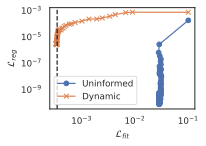

In [28]:
fig = plt.figure(constrained_layout=True, figsize=(0.5 * col_width, 0.35 * col_width))

plt.plot(df_static.mse, df_static.reg, 'o-', label='Uninformed')
plt.plot(df_dynamic.mse, df_dynamic.reg, 'x-', label='Dynamic')


plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\mathcal{L}_{fit}$')
plt.ylabel(r'$\mathcal{L}_{reg}$')
plt.legend()

plt.axvline(min_mse, color='k', linestyle='--')


plt.savefig('prior.pdf', bbox_inches='tight')

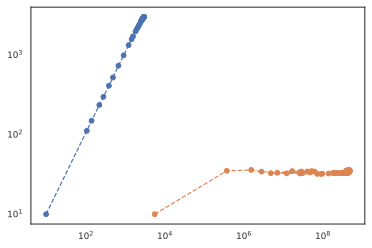

In [34]:
plt.loglog(df_dynamic.beta, df_dynamic.tau, 'o--')
plt.loglog(df_static.beta, df_static.tau, 'o--')

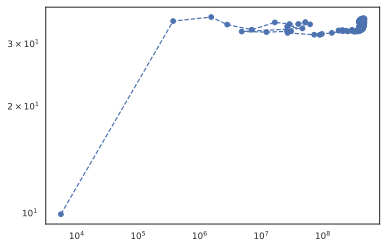